In [1]:
import pandas as pd
import random

train=pd.read_csv("iris_train.csv")
test=pd.read_csv("iris_test.csv")

merge=pd.merge(train,test,how="outer")

In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from IPython import display
import time


def list_vis(data, labels, centroids,iteration):
    plt.title(f"Iteration{iteration}")
    
    x = [x[0] for x in data]
    y = [x[3] for x in data]
    plt.scatter(x, y, c=labels)

    x = [x[0] for x in centroids]
    y = [x[3] for x in centroids]
    plt.scatter(x, y, c='black',s=75)
    
    plt.show()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.7)
    
def np_vis(data,labels, centroid, iteration):
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=data[:,0],y=data[:,3], c=labels)
    plt.scatter(x=centroid[:,0],y=centroid[:,3],c='black', s=75)
    plt.show
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.7)

# TASK 1: Using only list without numpy

In [3]:
data=list(merge.values)
for i in range(len(data)):
    data[i]=list(data[i][:-1])
    
    

def k_mean(data,k=5,max_itr=25):
    center=[]
    for i in range(k):
        center.append(random.choice(data))
        

    def distance(list1, list2):
        distance = 0
        for i in range(len(list1)):
            distance += (list1[i] - list2[i]) ** 2
        return distance ** 0.5

    
    new_center=[]
    iteration=0
    while new_center != center and iteration!=max_itr:
        new_center=center.copy()
        iteration+=1


        dis=[]
        for i in range(len(data)):
            row=[] #row=distance for each point to centroid k
            for u in range(k):
                row.append(distance(data[i],center[u]))
            dis.append(row)
        # to get index that assosited to the closest centroid
        labels=[]
        for i in range(len(dis)):
            Min=min(dis[i])
            Index=dis[i].index(Min)
            labels.append(Index)
            
        clusters = []
        for q in range(k):
            points = []
            for j in range(len(labels)):
                if labels[j] == q:
                    points.append(data[j]) #put the the points which is belong to the same centriod in own list
            clusters.append(points)  # if k =5 so 5list each list include centriods
            
        for m in range(k):
            mean = []
            for i in range(len(data[0])): 
                total = 0
                for x in clusters[m]:
                    
                    total += x[i]
                    
                mean.append(total / len(clusters[m])) 
            center[m]= mean
        list_vis(data, labels, center,iteration)
    #return labels, center
                                
k_mean(data,k=3,max_itr=25)

<Figure size 640x480 with 0 Axes>

# TASK 2: Using numpy

In [4]:
import numpy as np
data=merge.values
data=data[:,:-1]

def k_mean_np(data,k=3,max_itr=25):
    center= np.random.random([k,len(data[0])])
    dis= np.zeros([len(data),k])
    iteration=0
    
    #k zeros centers ==k
    new_center=np.zeros_like(center)
    
    while ((new_center!=center).all()) and iteration != max_itr:
        new_center=np.copy(center)

        for i in range(k):
            dis[:,i]=(((center[i]-data)**2).sum(axis=1)**0.5)
        labels=np.argmin(dis,axis=1)
    
        for i in range(k):
            center[i]=data[labels==i].mean(axis=0)
        
#        np_vis(data, labels, center, iteration)

        iteration+=1
    return labels, center
    
k_mean_np(data,k=3,max_itr=25)

(array([1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1,
        0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0,
        2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1,
        2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([[0.19611111, 0.59083333, 0.07864407, 0.06      ],
        [0.63504274, 0.41794872, 0.73794003, 0.75064103],
        [0.37777778, 0.26190476, 0.52106538, 0.48214286]]))

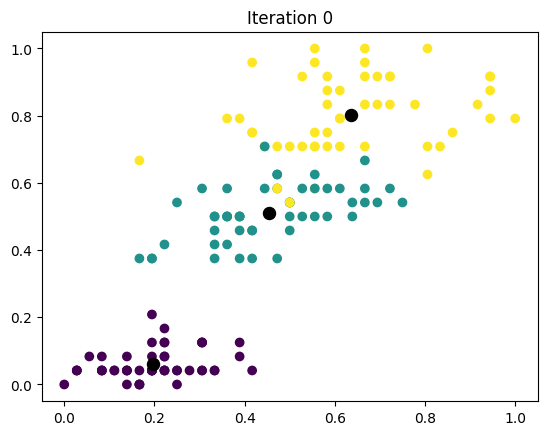

In [5]:
data=merge.values
x=data[:,:-1]
y_test=data[:,-1]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_test)
labels = le.transform(y_test)

center= np.random.random([3,len(x[0])])
for i in range(3):
    center[i]=x[labels==i].mean(axis=0)
    

np_vis(x, labels, center, 0)
